Importação de Bibliotecas

In [1]:
from urllib.request import urlopen
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt

Pedido ao usuário para inserir a cidade

In [2]:
print("---------------------------------JC CLIMA-------------------------------")

print("Digite a cidade que você quer saber o clima nos proximos 8 dias")

cidade = str(input())

---------------------------------JC CLIMA-------------------------------
Digite a cidade que você quer saber o clima nos proximos 8 dias
Fortaleza


Fazendo consulta na api

In [3]:
response = urlopen("https://api.hgbrasil.com/weather?key=xxxxxxx&city_name="+cidade).read()
dados = json.loads(response)
previsao = dados['results']['forecast']

In [4]:
cabecalho = ('Data','Dia da Semana','Maxima','Minima', 'Umidade','Chuva', 'Prob. de Chuva','Velocidade do Vento','Clima')

Percorrendo os dados e salvando em um csv

In [5]:
with open("clima.csv","w") as arquivo:
    writer = csv.writer(arquivo)
    writer.writerow(cabecalho)
    for dados in previsao:
        writer.writerow((dados['date'],dados['weekday'],dados['max'],dados['min'],dados['cloudiness'],dados['rain'],
                        dados['rain_probability'],dados['wind_speedy'],dados['description']))
        print('Salvando dados...')
    print("Dados salvos")

Salvando dados...
Salvando dados...
Salvando dados...
Salvando dados...
Salvando dados...
Salvando dados...
Salvando dados...
Salvando dados...
Salvando dados...
Salvando dados...
Dados salvos


Populando em uma tabela

In [6]:
df = pd.read_csv('clima.csv',encoding = 'unicode_escape')
print(df)


    Data Dia da Semana  Maxima  Minima  Umidade  Chuva  Prob. de Chuva  \
0  05/05           Sex      29      25     24.0   1.17              77   
1  06/05           Sáb      29      24     87.0   1.24              62   
2  07/05           Dom      28      24     33.0   4.49              96   
3  08/05           Seg      28      24     95.0   7.67              95   
4  09/05           Ter      28      24     92.0   8.77              96   
5  10/05           Qua      28      24     81.0   9.20              95   
6  11/05           Qui      28      25     35.0   7.87              93   
7  12/05           Sex      29      25     47.0   5.56              86   
8  13/05           Sáb      27      24     61.0  14.97             100   
9  14/05           Dom      27      25    100.0  20.99              99   

  Velocidade do Vento            Clima  
0            5.8 km/h  Chuvas esparsas  
1           6.19 km/h  Chuvas esparsas  
2            4.6 km/h  Chuvas esparsas  
3           4.81 km/h

Mostrando a maior temperatura

In [7]:
maxima = df['Maxima']

tempmax = maxima.max()
print(tempmax)
tabeladiamax = df.loc[maxima == tempmax]
diasmax       = tabeladiamax['Data']
    
print("A maior incidencia de temperatura irá acontecer no dia(s) "+', '.join(str(dia) for dia in diasmax)+" com temperatura de "+str(tempmax))

29
A maior incidencia de temperatura irá acontecer no dia(s) 05/05, 06/05, 12/05 com temperatura de 29


Mostrando a menor temperatura

In [8]:
minima       = df['Minima']
tempmin      = minima.min()
tabeladiamin = df.loc[minima == tempmin]
diasmin      = tabeladiamin['Data']
print("A menor incidencia de temperatura irá acontecer no dia(s) "+", ".join(str(dia) for dia in diasmin)+ " com temperatura de "+str(tempmin))

A menor incidencia de temperatura irá acontecer no dia(s) 06/05, 07/05, 08/05, 09/05, 10/05, 13/05 com temperatura de 24


gravando os dados dos gráficos em uma lista

In [9]:
graficotempmax = [dados['max'] for dados in previsao]
graficotempmin = [dados['min'] for dados in previsao]
graficodias    = [dados['date'] for dados in previsao]

Plotando o gráfico

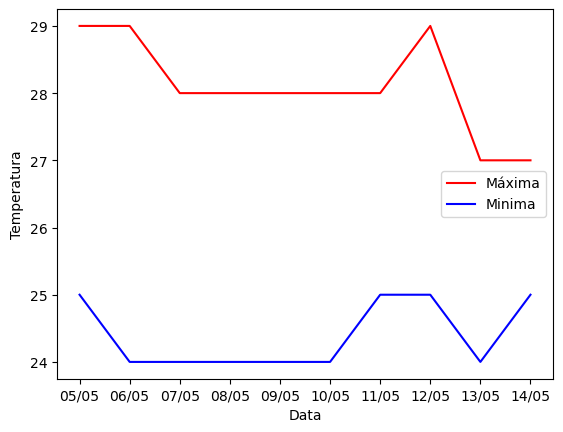

In [10]:

plt.plot(graficodias,graficotempmax,label='Máxima',color='Red')
plt.plot(graficodias,graficotempmin,label='Minima',color='Blue')
plt.xlabel('Data')
plt.ylabel('Temperatura')
plt.legend()
plt.show()